In [ ]:
import pandas as pd

# Definir los nombres de las columnas esperadas
column_names = ['Fecha', 'Presentación', 'Origen', 'Precio Min', 'Precio Max', 'Precio Frec', 'Envase']

# 1. Cargar el archivo, saltando las primeras 2 filas y sin encabezado para asignar los nuestros.
try:
    df = pd.read_csv('/content/sample_data/tomates.csv', encoding='latin1', skiprows=2, header=None)
except:
    # Si falla, intentamos con otro encoding común
    df = pd.read_csv('/content/sample_data/tomates.csv', encoding='utf-8', skiprows=2, header=None)

# Asignar los nombres de las columnas
df.columns = column_names

# 2. Función ajustada a lo que vi en tu imagen (Caja de 20 kg)
def limpiar_precio(row):
    try:
        precio_bruto = float(str(row['Precio Frec']).replace(',', '')) # Quitamos comas si las hay
        presentacion = str(row['Presentación']).lower()

        # Tu imagen muestra "Caja de 20 kg", así que dividimos entre 20
        if '20 kg' in presentacion:
            return precio_bruto / 20
        elif '30 kg' in presentacion: # Por si acaso aparecen otras
            return precio_bruto / 30
        else:
            return precio_bruto # Si no dice caja, asumimos que es kilo o se deja igual
    except:
        return None # Si hay un error en la fila, lo marcamos como vacío

# 3. Aplicar la limpieza
df['Precio_Kg_Real'] = df.apply(limpiar_precio, axis=1)

# 4. Limpiar fechas (Día/Mes/Año)
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)

# 5. ¡Veamos el resultado!
print("Primeras 5 filas limpias:")
print(df[['Fecha', 'Origen', 'Presentación', 'Precio_Kg_Real']].head())

print("\nEstadísticas rápidas del precio por Kilo:")
print(df['Precio_Kg_Real'].describe())

Primeras 5 filas limpias:
       Fecha   Origen    Presentación  Precio_Kg_Real
0 2025-01-02  Morelos  Caja de 20 kg.            18.5
1 2025-01-03  Morelos  Caja de 20 kg.            18.5
2 2025-01-06  Morelos  Caja de 20 kg.            17.5
3 2025-01-07  Morelos  Caja de 20 kg.            20.0
4 2025-01-08  Morelos  Caja de 20 kg.            20.0

Estadísticas rápidas del precio por Kilo:
count    219.000000
mean      14.442922
std        4.215272
min        7.500000
25%       11.000000
50%       14.000000
75%       17.500000
max       22.000000
Name: Precio_Kg_Real, dtype: float64


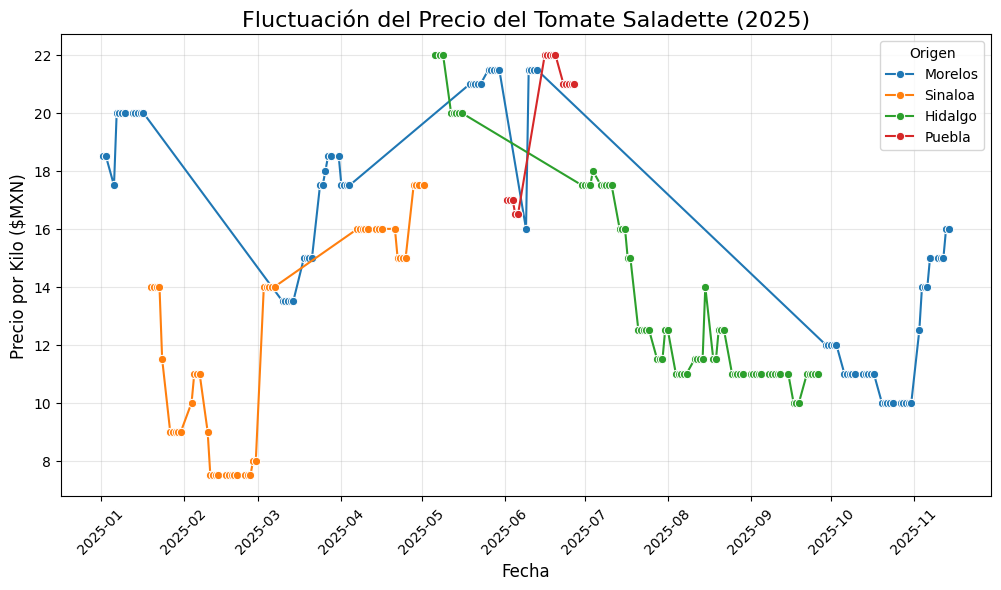

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la gráfica (para que se vea ancha y bien)
plt.figure(figsize=(12, 6))

# Crear el gráfico de líneas
# x = Fecha (Tiempo)
# y = Precio (Dinero)
# hue = Origen (Para ver quién vende más barato, si Sinaloa o Morelos)
sns.lineplot(data=df, x='Fecha', y='Precio_Kg_Real', hue='Origen', marker='o')

# Decoración para que parezca reporte ejecutivo
plt.title('Fluctuación del Precio del Tomate Saladette (2025)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio por Kilo ($MXN)', fontsize=12)
plt.grid(True, alpha=0.3) # Cuadrícula suave de fondo
plt.xticks(rotation=45) # Rotar fechas para que se lean bien

plt.show()

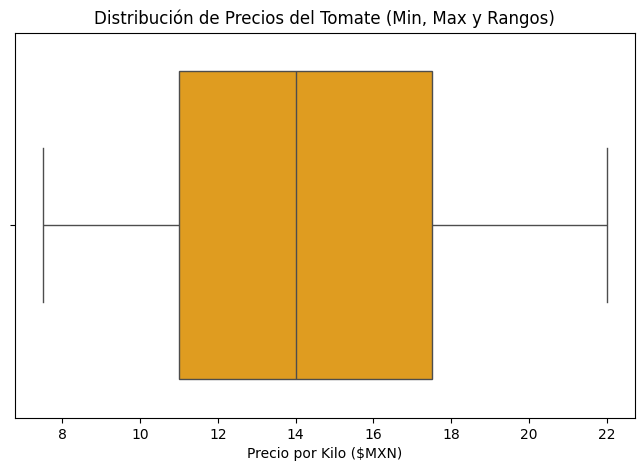

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Precio_Kg_Real'], color='orange')
plt.title('Distribución de Precios del Tomate (Min, Max y Rangos)')
plt.xlabel('Precio por Kilo ($MXN)')
plt.show()

/tmp/ipython-input-2554617865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Origen', y='Precio_Kg_Real', palette="Set2")


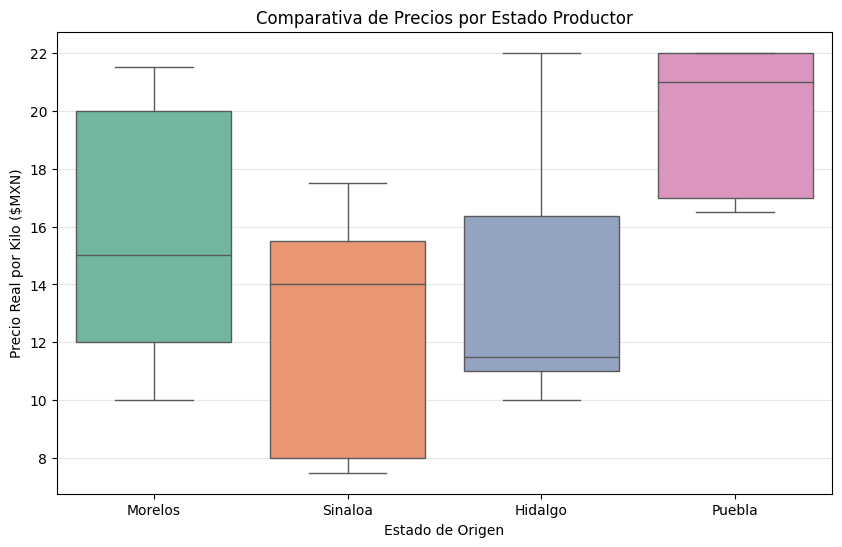

In [ ]:
plt.figure(figsize=(10, 6))

# Boxplot: Compara la distribución de precios por Origen
sns.boxplot(data=df, x='Origen', y='Precio_Kg_Real', palette="Set2")

plt.title('Comparativa de Precios por Estado Productor')
plt.ylabel('Precio Real por Kilo ($MXN)')
plt.xlabel('Estado de Origen')
plt.grid(axis='y', alpha=0.3)

plt.show()

In [ ]:
# Contar cuántos registros (días de venta) tiene cada estado
conteo = df['Origen'].value_counts()
print(conteo)

Origen
Morelos    81
Hidalgo    72
Sinaloa    51
Puebla     15
Name: count, dtype: int64


/tmp/ipython-input-3256969466.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_estados, x='Estado', y='Días en Mercado', palette='viridis')


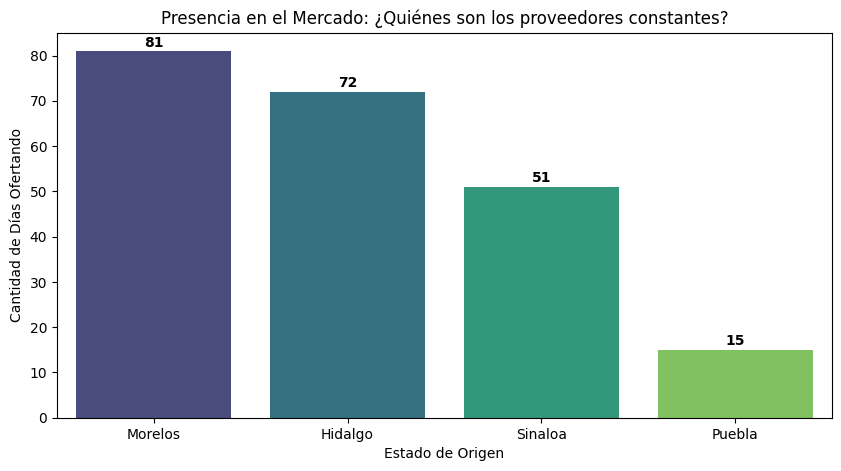

In [ ]:
# Contar cuántas veces aparece cada estado
conteo_estados = df['Origen'].value_counts().reset_index()
conteo_estados.columns = ['Estado', 'Días en Mercado']

plt.figure(figsize=(10, 5))

# Gráfico de Barras: ¿Quién dominó el mercado?
sns.barplot(data=conteo_estados, x='Estado', y='Días en Mercado', palette='viridis')

plt.title('Presencia en el Mercado: ¿Quiénes son los proveedores constantes?')
plt.ylabel('Cantidad de Días Ofertando')
plt.xlabel('Estado de Origen')

# Añadir el número exacto encima de cada barra
for index, row in conteo_estados.iterrows():
    plt.text(index, row['Días en Mercado'] + 1, str(row['Días en Mercado']),
             ha='center', color='black', fontweight='bold')

plt.show()